# Joining Data

This notebook contains code for joining data from the Yelp API and the CityBike API. 

This notebook is structured as follows: 

0. Joining Tables with Business and Bike Information
1. Exploratory Data Analysis
2. Data Visualization for EDA
3. SQL

The following topics from the evaluation rubric are covered in this notebook:

- Data Wrangling
- Exploratory Data Analysis
- Data Visualization for EDA
- SQL

## 0. Joining Tables with Business and Bike Information
Start with 3 tables: 
- table with unique business information: y_businesses_unique_clean - call businesses
- intermediary table with relationships between bike stations and businesses: y_id_station_ids - call id_station_ids
- table with availability information at bike stations: df_stations - call stations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
businesses = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/y_businesses_unique_clean.csv")
id_station_ids = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/y_id_station_ids.csv")
stations = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/df_stations.csv")

In [23]:
#View all tables
businesses.head(2)

,id,name,review_count,rating
0,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281,4.0
1,oHYOa9l5aLOQpJ8dF6sDmA,Menya Raizo,68,4.0


In [4]:
id_station_ids.head(2)

,id,station_id
0,NensKn1MSVU_rm-1Y6WlFA,7a19c49f486d7c0c02b3685d7b240448
1,oHYOa9l5aLOQpJ8dF6sDmA,7a19c49f486d7c0c02b3685d7b240448


In [5]:
stations.head(2)

,Station ID,latitude,longitude,Station Name,Data Collection Timestamp,Empty Slots,Available Bikes,Total Slots,Status,Proportion of Bikes Available (%)
0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
1,32603a87cfca71d0f7dfa3513bad69d5,49.274566,-123.121817,0004 Yaletown-Roundhouse Station,2022-11-12T18:26:37.848000Z,14,2,16,online,12.0


### Merge businesses and intermediary table

In [6]:
#Check for duplicate keys in tables to merge
print(businesses.duplicated('id').sum())
print(id_station_ids.duplicated(('id', 'station_id')).sum())
print(stations.duplicated('Station ID').sum())

0
0
0


In [7]:
#Merge businesses and intermediary table
businesses_w_station_ids = businesses.merge(id_station_ids, how='inner', on='id')
businesses_w_station_ids

,id,name,review_count,rating,station_id
0,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281,4.0,7a19c49f486d7c0c02b3685d7b240448
1,oHYOa9l5aLOQpJ8dF6sDmA,Menya Raizo,68,4.0,7a19c49f486d7c0c02b3685d7b240448
2,oHYOa9l5aLOQpJ8dF6sDmA,Menya Raizo,68,4.0,9130f9aa3bb037a04c17e6f2630327e5
3,3sTVFA9wQQT_7RTUj_g1rw,Donair Spot,42,4.0,7a19c49f486d7c0c02b3685d7b240448
4,3sTVFA9wQQT_7RTUj_g1rw,Donair Spot,42,4.0,9130f9aa3bb037a04c17e6f2630327e5
...,...,...,...,...,...
1595,kRfJn1Fwcl3iXmYhKalI5w,Jack Poole Plaza,4,5.0,f3708906ec71348f5a42579fede36a0d
1596,4f8mgwrPV_XRXMP9qLVhow,Starbucks,11,3.5,f3708906ec71348f5a42579fede36a0d
1597,e8eDD0Cn_cRNoFhj90H7sw,Caffè Super Veloce,3,4.5,f3708906ec71348f5a42579fede36a0d
1598,FwaxOvge4_iOmivWn20Zng,Nike - Greek God,3,4.0,f3708906ec71348f5a42579fede36a0d


In [80]:
#Merge business_w_station_ids with stations table
biz_and_station_info = businesses_w_station_ids.merge(stations, how='right', left_on='station_id', right_on='Station ID')
biz_and_station_info

,id,name,review_count,rating,station_id,Station ID,latitude,longitude,Station Name,Data Collection Timestamp,Empty Slots,Available Bikes,Total Slots,Status,Proportion of Bikes Available (%)
0,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281.0,4.0,7a19c49f486d7c0c02b3685d7b240448,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
1,oHYOa9l5aLOQpJ8dF6sDmA,Menya Raizo,68.0,4.0,7a19c49f486d7c0c02b3685d7b240448,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
2,3sTVFA9wQQT_7RTUj_g1rw,Donair Spot,42.0,4.0,7a19c49f486d7c0c02b3685d7b240448,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
3,1AA4EjIIXywxOSnbyZ9vLA,Pho Extreme Xe Lua,101.0,2.5,7a19c49f486d7c0c02b3685d7b240448,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
4,31ag-M_QiaycGQrvAi169w,Jollibee,6.0,4.5,7a19c49f486d7c0c02b3685d7b240448,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,EDL7QoKosndp89SjjG01WA,7-Eleven,12.0,3.5,a6c6df138cbc97b9f81e7ffbbebdde6f,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0
1666,-JmmzX_t8XByqeHpIr4mpw,Starbucks,5.0,3.5,a6c6df138cbc97b9f81e7ffbbebdde6f,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0
1667,knF9zq8FM6ewSzbw8xnTQA,Freshii,4.0,3.5,a6c6df138cbc97b9f81e7ffbbebdde6f,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0
1668,l8TYmClsb2qIMowUTtasww,Starbucks,1.0,3.0,a6c6df138cbc97b9f81e7ffbbebdde6f,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0


In [81]:
#drop extra station id column
biz_and_station_info.drop(labels="station_id", axis=1)

,id,name,review_count,rating,Station ID,latitude,longitude,Station Name,Data Collection Timestamp,Empty Slots,Available Bikes,Total Slots,Status,Proportion of Bikes Available (%)
0,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281.0,4.0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
1,oHYOa9l5aLOQpJ8dF6sDmA,Menya Raizo,68.0,4.0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
2,3sTVFA9wQQT_7RTUj_g1rw,Donair Spot,42.0,4.0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
3,1AA4EjIIXywxOSnbyZ9vLA,Pho Extreme Xe Lua,101.0,2.5,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
4,31ag-M_QiaycGQrvAi169w,Jollibee,6.0,4.5,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,EDL7QoKosndp89SjjG01WA,7-Eleven,12.0,3.5,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0
1666,-JmmzX_t8XByqeHpIr4mpw,Starbucks,5.0,3.5,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0
1667,knF9zq8FM6ewSzbw8xnTQA,Freshii,4.0,3.5,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0
1668,l8TYmClsb2qIMowUTtasww,Starbucks,1.0,3.0,a6c6df138cbc97b9f81e7ffbbebdde6f,49.277527,-123.129464,0196 Hornby & Drake,2022-11-12T18:26:38.113000Z,23,1,24,online,4.0


In [82]:
#save to csv
biz_and_station_info.to_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/biz_and_station_info.csv", index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

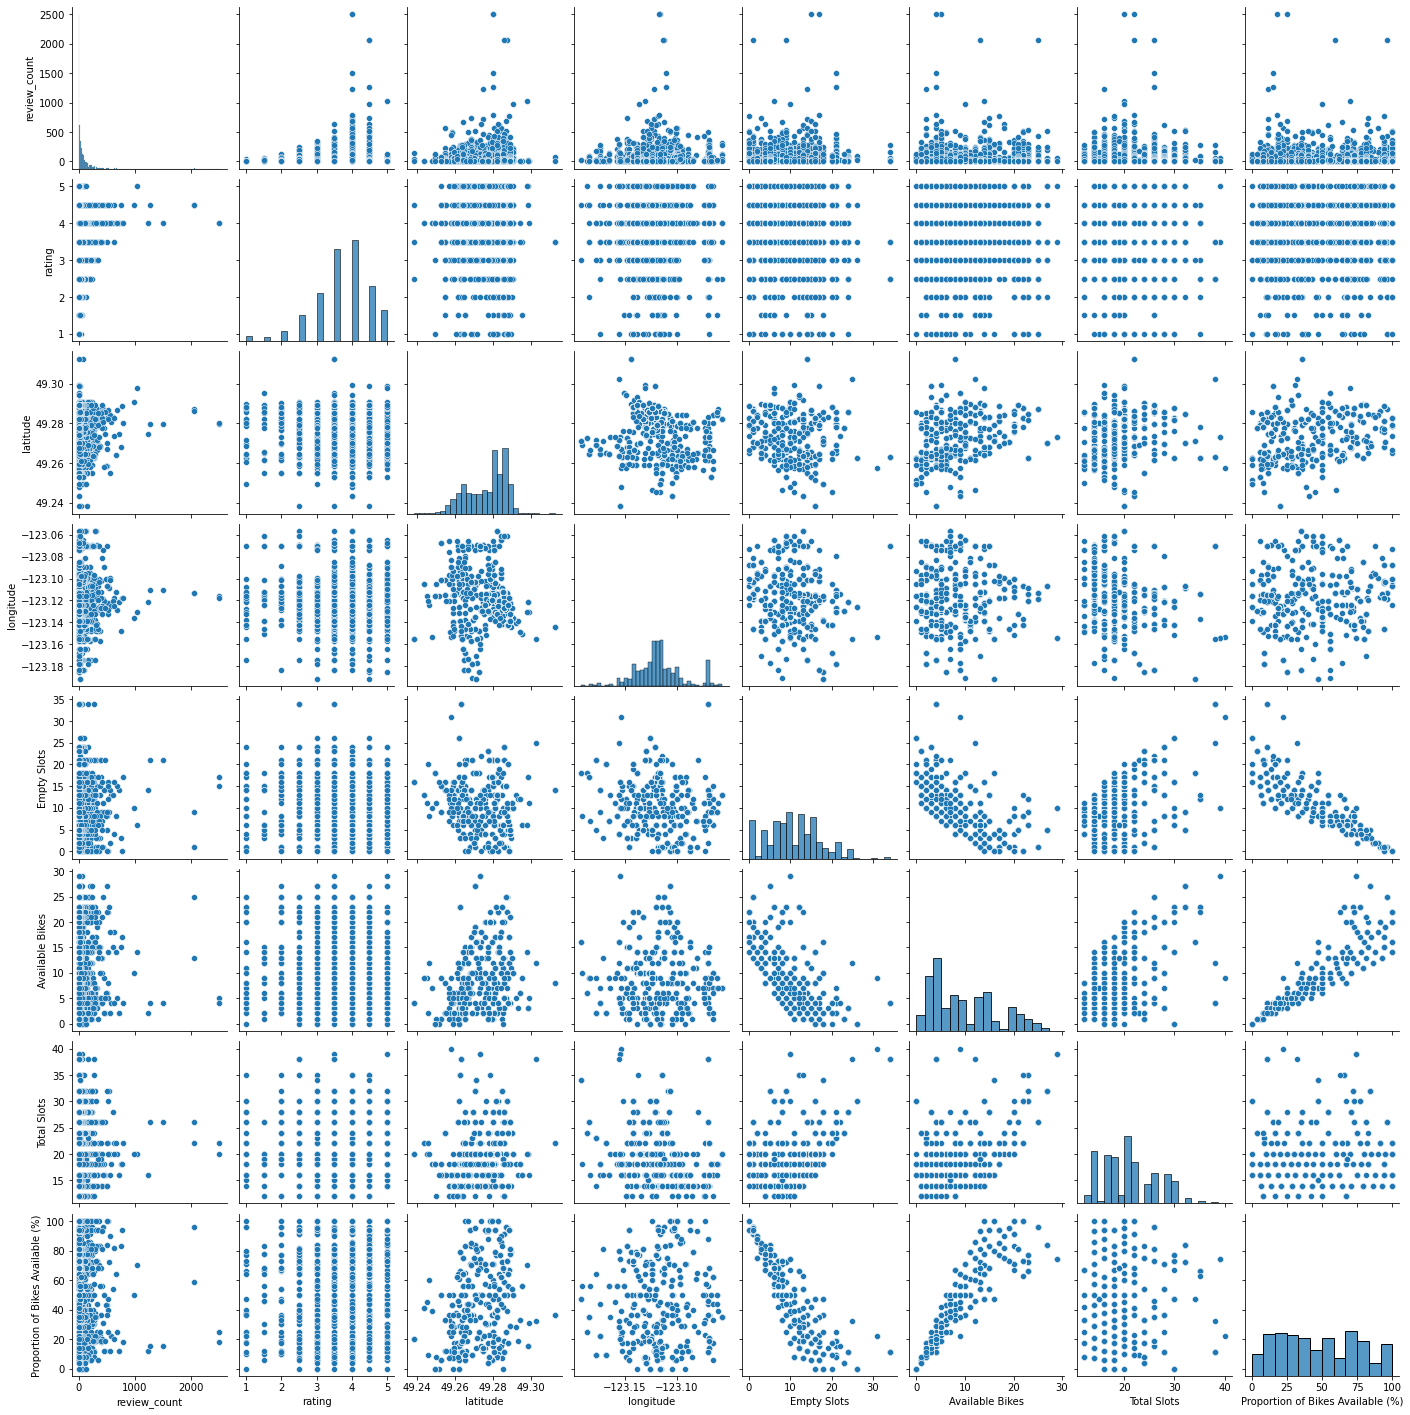

In [83]:
sns.pairplot(biz_and_station_info)
plt.show()

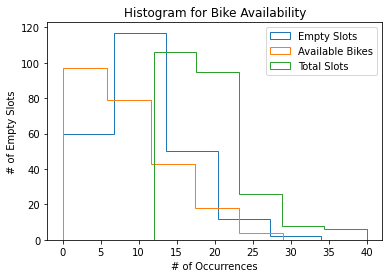

In [84]:
fig, ax = plt.subplots()
ax.hist(stations['Empty Slots'], histtype='step', bins=5, label="Empty Slots")
ax.hist(stations['Available Bikes'], histtype='step', bins=5, label="Available Bikes")
ax.hist(stations['Total Slots'], histtype='step', bins=5, label="Total Slots")
ax.set_title("Histogram for Bike Availability")
ax.set_xlabel("# of Occurrences")
ax.set_ylabel("# of Empty Slots")
ax.legend()
plt.show()

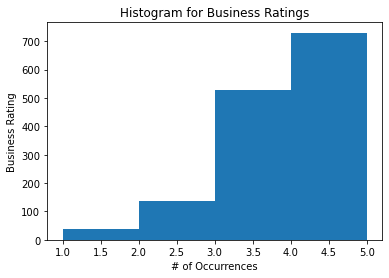

In [85]:
fig, ax = plt.subplots()
ax.hist(businesses['rating'], bins=[1,2,3,4,5], label="Rating")
ax.set_title("Histogram for Business Ratings")
ax.set_xlabel("# of Occurrences")
ax.set_ylabel("Business Rating")
plt.show()

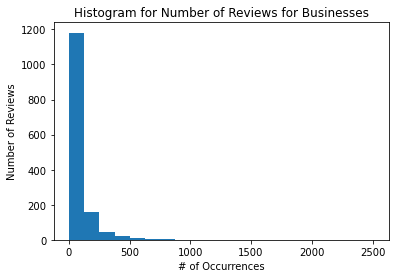

In [86]:
fig, ax = plt.subplots()
ax.hist(businesses['review_count'], bins=20)
ax.set_title("Histogram for Number of Reviews for Businesses")
ax.set_xlabel("# of Occurrences")
ax.set_ylabel("Number of Reviews")
plt.show()

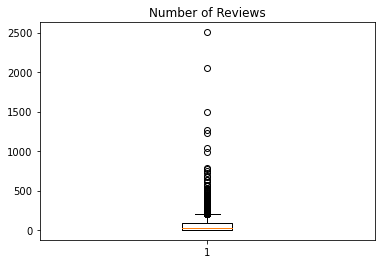

In [87]:
fig, ax = plt.subplots()
ax.boxplot(businesses['review_count'])
ax.set_title("Number of Reviews")
plt.show()

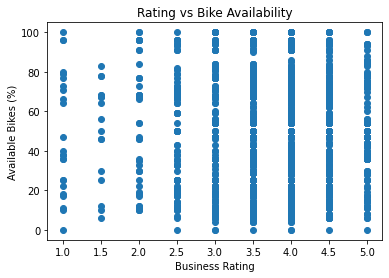

In [88]:
fig, ax = plt.subplots()
ax.scatter(biz_and_station_info['rating'], biz_and_station_info['Proportion of Bikes Available (%)'])
ax.set_title("Rating vs Bike Availability")
ax.set_xlabel("Business Rating")
ax.set_ylabel("Available Bikes (%)")
plt.show()

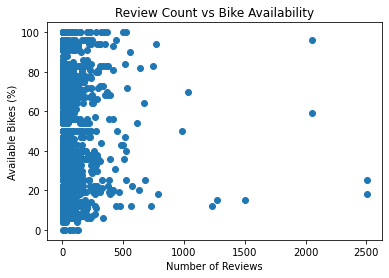

In [89]:
fig, ax = plt.subplots()
ax.scatter(biz_and_station_info['review_count'], biz_and_station_info['Proportion of Bikes Available (%)'])
ax.set_title("Review Count vs Bike Availability")
ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Available Bikes (%)")
plt.show()

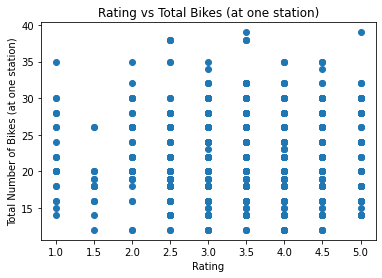

In [90]:
fig, ax = plt.subplots()
ax.scatter(biz_and_station_info['rating'], biz_and_station_info['Total Slots'])
ax.set_title("Rating vs Total Bikes (at one station)")
ax.set_xlabel("Rating")
ax.set_ylabel("Total Number of Bikes (at one station)")
plt.show()

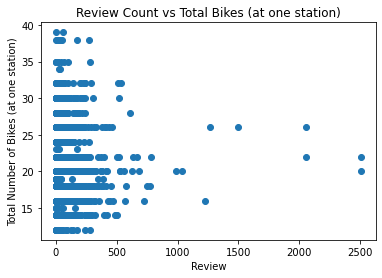

In [91]:
fig, ax = plt.subplots()
ax.scatter(biz_and_station_info['review_count'], biz_and_station_info['Total Slots'])
ax.set_title("Review Count vs Total Bikes (at one station)")
ax.set_xlabel("Review")
ax.set_ylabel("Total Number of Bikes (at one station)")
plt.show()

In [92]:
biz_and_station_info.corr()

,review_count,rating,latitude,longitude,Empty Slots,Available Bikes,Total Slots,Proportion of Bikes Available (%)
review_count,1.000000,0.072655,0.028079,0.004272,-0.000060,-0.009892,-0.012523,-0.011278
rating,0.072655,1.000000,-0.084393,-0.010481,-0.044029,-0.020562,-0.080132,0.016514
latitude,0.028079,-0.084393,1.000000,-0.159771,-0.063980,0.283725,0.297182,0.224617
longitude,0.004272,-0.010481,-0.159771,1.000000,-0.068715,-0.054827,-0.150378,-0.021609
Empty Slots,-0.000060,-0.044029,-0.063980,-0.068715,1.000000,-0.670870,0.305931,-0.875898
Available Bikes,-0.009892,-0.020562,0.283725,-0.054827,-0.670870,1.000000,0.498399,0.900851
Total Slots,-0.012523,-0.080132,0.297182,-0.150378,0.305931,0.498399,1.000000,0.132649
Proportion of Bikes Available (%),-0.011278,0.016514,0.224617,-0.021609,-0.875898,0.900851,0.132649,1.000000


# 3. Create SQLite Database

<b>Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)</b>

3 tables in database:

|Table Name|Table Description|Table Primary Key|
|---|---|---|
|businesses|Contains information about businesses (ratings and review count)|"id" - Yelp's automatically generated unique key for each business|
|id_station_ids|Intermediary table so that a many-to-many relationship between bike stations and businesses can exist|"station_id" and "id" combined are the primary key of this table|
|stations|Contains information about bike stations|"Station ID"|


In [93]:
#Import csv files.
businesses = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/y_businesses_unique_clean.csv")
id_station_ids = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/y_id_station_ids.csv")
stations = pd.read_csv("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/data/df_stations.csv")

Look at the data before and after the join to validate your data.

In [94]:
#View all files to validate. 
businesses.head(2)

,id,name,review_count,rating
0,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281,4.0
1,oHYOa9l5aLOQpJ8dF6sDmA,Menya Raizo,68,4.0


In [95]:
id_station_ids.head(2)

,id,station_id
0,NensKn1MSVU_rm-1Y6WlFA,7a19c49f486d7c0c02b3685d7b240448
1,oHYOa9l5aLOQpJ8dF6sDmA,7a19c49f486d7c0c02b3685d7b240448


In [96]:
stations.head(2)

,Station ID,latitude,longitude,Station Name,Data Collection Timestamp,Empty Slots,Available Bikes,Total Slots,Status,Proportion of Bikes Available (%)
0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-12T18:26:37.834000Z,12,23,35,online,66.0
1,32603a87cfca71d0f7dfa3513bad69d5,49.274566,-123.121817,0004 Yaletown-Roundhouse Station,2022-11-12T18:26:37.848000Z,14,2,16,online,12.0


In [97]:
import sqlite3
from sqlite3 import Error

In [98]:
#Create a function to create a database. 
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
        
    return connection

In [99]:
con = create_connection("C:/Users/mnicn/local_documents/lighthouse-data-notes/Week 3/Project 2 Fresh Files/Project2.sqlite")

Connection to SQLite DB successful


In [100]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

<b>Steps for creation of each table in the SQLite Database: </b>
1. Create table in SQL database using to_sql command.
2. Create separate table with identical columns with the primary/foreign keys set up.
3. Copy data from the first table into the table with keys set up.
4. Delete original table. 
5. Rename final table. 

In [101]:
businesses.to_sql("businesses", con, if_exists="replace")
id_station_ids.to_sql("id_station_ids", con, if_exists="replace")
stations.to_sql("stations", con, if_exists="replace")

241

<b>Creation of table 'stations'</b>

In [102]:
create_stations_with_pk = """
CREATE TABLE stations_with_pk
(
    "Station ID" TEXT NOT NULL PRIMARY KEY,
    "latitude" REAL,
    "longitude" REAL, 
    "Station Name" TEXT,
    "Data Collection Timestamp",
    "Empty Slots" INTEGER,
    "Available Bikes" INTEGER,
    "Total Slots" INTEGER,
    "Status" TEXT,
    "Proportion of Available Bikes (%)" REAL
)
"""

In [103]:
execute_query(con, create_stations_with_pk)

Query executed successfully


In [104]:
insert_into_station_table = """
INSERT INTO stations_with_pk SELECT 
    "Station ID",
    "latitude",
    "longitude", 
    "Station Name",
    "Data Collection Timestamp",
    "Empty Slots",
    "Available Bikes",
    "Total Slots",
    "Status",
    "Proportion of Available Bikes (%)"
FROM stations
"""

In [105]:
execute_query(con, insert_into_station_table)

Query executed successfully


In [106]:
drop_table_stations = """
    DROP TABLE stations
"""

In [107]:
execute_query(con, drop_table_stations)

Query executed successfully


In [108]:
rename_stations_table = """
    ALTER TABLE stations_with_pk RENAME TO stations;
"""

In [109]:
execute_query(con, rename_stations_table)

Query executed successfully


<b>Creation of table 'businesses'</b>

In [110]:
create_businesses_with_pk = """
CREATE TABLE businesses_with_pk
(
    "id" TEXT NOT NULL PRIMARY KEY,
    "name" TEXT,
    "review_count" INTEGER, 
    "Rating" REAL
)
"""

In [111]:
execute_query(con, create_businesses_with_pk)

Query executed successfully


In [112]:
insert_into_businesses_table = """
INSERT INTO businesses_with_pk SELECT 
    "id",
    "name",
    "review_count", 
    "Rating"
FROM businesses
"""

In [113]:
execute_query(con, insert_into_businesses_table)

Query executed successfully


In [114]:
drop_table_businesses = """
    DROP TABLE businesses
"""

In [115]:
execute_query(con, drop_table_businesses)

Query executed successfully


In [116]:
rename_businesses_table = """
    ALTER TABLE businesses_with_pk RENAME TO businesses;
"""

In [117]:
execute_query(con, rename_businesses_table)

Query executed successfully


<b>Create Intermediary Table</b>

In [118]:
create_fk = """
CREATE TABLE fk
(
  "id" TEXT NOT NULL,
  "station_id" TEXT NOT NULL, 
  CONSTRAINT fk FOREIGN KEY ("id") REFERENCES businesses ("id"),
  CONSTRAINT fk FOREIGN KEY ("station_id") REFERENCES stations ("Station ID")
);
"""

In [119]:
execute_query(con, create_fk)

Query executed successfully


In [120]:
insert_into_fk_table = """
INSERT INTO fk SELECT 
    "id",
    "station_id"
FROM id_station_ids
"""

In [121]:
execute_query(con, insert_into_fk_table)

Query executed successfully


In [122]:
drop_table_id_station_ids = """
    DROP TABLE id_station_ids
"""

In [123]:
execute_query(con, drop_table_id_station_ids)

Query executed successfully


In [124]:
rename_fk_table = """
    ALTER TABLE fk RENAME TO id_station_ids;
"""

In [74]:
execute_query(con, rename_fk_table)

Query executed successfully
